## Include all necessary Libraries

In [1]:
# Base Libraries
import os                                                                 # OS Library
import pandas as pd                                                       # Pandas Library
import numpy as np                                                        # Numpy Library
from fastai.tabular.all import df_shrink                                  # Library to shrink 
from fastcore.parallel import *                                           # Library for parallel tasks
import time                                                               # Time function library
import matplotlib.pyplot as plt                                           # plot library
import seaborn as sns                                                     # plot library
# import memory_profiler, memory_                                         # memory usage library
from memory_profiler import memory_usage
from collections import Counter                                           # Counter library
from sklearn.pipeline import Pipeline, make_pipeline
from imblearn.pipeline import Pipeline
import psutil
from tqdm import tqdm

# Libraries for feature engineering
from sklearn.model_selection import train_test_split                      # Dataset split library
# from sklearn.model_selection import GridSearchCV                          # Gridsearch library for hyper parameter tuning
from sklearn.preprocessing import LabelEncoder                            # LabelEnoder
# from sklearn.preprocessing import OneHotEncoder                           # Onehotencoding 
from sklearn.feature_selection import VarianceThreshold                   # For removing zero variance features
from sklearn.preprocessing import MinMaxScaler, StandardScaler            # Apply Standarization and Normalization 
from imblearn.over_sampling import SMOTE, SMOTEN, SMOTENC                 # Over-sampling Library
from imblearn.under_sampling import RandomUnderSampler, TomekLinks        # Under-Sampling
# from imblearn.combine import SMOTETomek

# ML Model Libraries
# from sklearn.linear_model import LogisticRegression                       # Logistic Regression
# from sklearn.tree import DecisionTreeClassifier                           # Decision Tree Classifier
# from sklearn.ensemble import RandomForestClassifier                       # Random forest Classifier
# from sklearn.ensemble import AdaBoostClassifier                           # AdaBoost Classifier
# from sklearn.svm import SVC                                               # SVM Library
# from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB   # naive base classifiers library

# Performance measure Libraries for Trained model 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Deep learning Model Libraries
# import tensorflow as tf
import torch.nn as nn
import torch.optim as optim
import torch
from torch.utils.data import DataLoader, TensorDataset
# from tensorflow import keras
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout  



ModuleNotFoundError: No module named 'fastai'

## Create a csv read function 

In [5]:
def csvRead (sfilePath):
    print("CSV Read function started........")
#     ind_dfs = [pd.read_csv(dsp) for dsp in filePathArray]
    ind_dfs = pd.read_csv(sfilePath)
    return ind_dfs

## Create a datatype downsizing function

In [6]:
def dataTypeDown(ind_dfs_read):
    print("Datatype Downsizing function started........")
#     ind_dfs_down = parallel(df_shrink, ind_dfs_read, progress=True)
    ind_dfs_down = df_shrink(ind_dfs_read)
    return ind_dfs_down

## List the files in our target directory we are interested to read

In [7]:
filePath = []
individual_dfs = []

# for root, subdir, files in os.walk('D:/Datasets/CICDDoS2019/testing_03_11/'):
for root, subdir, files in os.walk('/home/deeplearning/Datasets/CICDDoS2019/testing_03_11'):
# print(root)
    for file in files:
        if file.endswith('.csv'):
            fpath = os.path.join(root,file)
            filePath.append(fpath)
            print (fpath)
            print("-----------------------------------------------------------------------")
#             print (f'Total no of files meet our criteria are: ', len(filePath))
            if (len(filePath)):
                ind_dfs_read = csvRead(fpath)
#                 time.sleep(15)
                print("starting downsizing.....")
#                 individual_dfs = [dataTypeDown(ind_dfs_read)]
                individual_dfs.append(dataTypeDown(ind_dfs_read))
                print(f'No. of Instances in the file are:',ind_dfs_read.shape)
#                 time.sleep(5)
print('**************************')
print (f'Total no of files meet our criteria are: ', len(filePath))
print("Dataset Read Task Completed!!!!")

D:/Datasets/CICDDoS2019/testing_03_11/LDAP-MSSQL.csv
-----------------------------------------------------------------------
CSV Read function started........
starting downsizing.....
Datatype Downsizing function started........
No. of Instances in the file are: (256201, 78)
D:/Datasets/CICDDoS2019/testing_03_11/MSSQL-UDP.csv
-----------------------------------------------------------------------
CSV Read function started........
starting downsizing.....
Datatype Downsizing function started........
No. of Instances in the file are: (1295988, 78)
D:/Datasets/CICDDoS2019/testing_03_11/NetBIOS-LDAP.csv
-----------------------------------------------------------------------
CSV Read function started........
starting downsizing.....
Datatype Downsizing function started........
No. of Instances in the file are: (22445, 78)
D:/Datasets/CICDDoS2019/testing_03_11/NetBIOS.csv
-----------------------------------------------------------------------
CSV Read function started........
starting downsi

## Replace space with "_" in dataset column names

In [8]:
for i in individual_dfs:
    # Remove leading and trailing spaces from column names
#     cleaned_columns = [col.strip() for col in cols]
#     print(cleaned_columns)
    cols = i.columns.str.strip()
#     cols = [col.strip() for col in cols]
    cols = cols.map(lambda x: x.replace(' ', '_') )
    i.columns = cols
#     print(i.columns)
print('Task Completed')

Task Completed


## Dataset summary

In [9]:
# individual_dfs[0].info(verbose=True)
individual_dfs[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256201 entries, 0 to 256200
Data columns (total 78 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   Protocol                     256201 non-null  int8    
 1   Flow_Duration                256201 non-null  int32   
 2   Total_Fwd_Packets            256201 non-null  int16   
 3   Total_Backward_Packets       256201 non-null  int16   
 4   Total_Length_of_Fwd_Packets  256201 non-null  float32 
 5   Total_Length_of_Bwd_Packets  256201 non-null  float32 
 6   Fwd_Packet_Length_Max        256201 non-null  float32 
 7   Fwd_Packet_Length_Min        256201 non-null  float32 
 8   Fwd_Packet_Length_Mean       256201 non-null  float32 
 9   Fwd_Packet_Length_Std        256201 non-null  float32 
 10  Bwd_Packet_Length_Max        256201 non-null  float32 
 11  Bwd_Packet_Length_Min        256201 non-null  float32 
 12  Bwd_Packet_Length_Mean       256201 non-null

## Dataset split into X (input) and y (Target)

In [10]:
individual_X = []
individual_y = []
count = 0
for i in individual_dfs:
#     Target (Output) values
    temp_y = i.copy()
    individual_y.append(i['Label'])
    print(individual_y[count].shape)
#     Input values
    temp_X = i.copy()
    temp_X = temp_X.drop('Label', axis=1)
    individual_X.append(temp_X)
    print(individual_X[count].shape)
    count+=1
    print('------------------------------')

(256201,)
(256201, 77)
------------------------------
(1295988,)
(1295988, 77)
------------------------------
(22445,)
(22445, 77)
------------------------------
(11028,)
(11028, 77)
------------------------------
(5998,)
(5998, 77)
------------------------------
(479899,)
(479899, 77)
------------------------------
(139566,)
(139566, 77)
------------------------------


## Verify the split task

In [11]:
individual_X[0].columns

Index(['Protocol', 'Flow_Duration', 'Total_Fwd_Packets',
       'Total_Backward_Packets', 'Total_Length_of_Fwd_Packets',
       'Total_Length_of_Bwd_Packets', 'Fwd_Packet_Length_Max',
       'Fwd_Packet_Length_Min', 'Fwd_Packet_Length_Mean',
       'Fwd_Packet_Length_Std', 'Bwd_Packet_Length_Max',
       'Bwd_Packet_Length_Min', 'Bwd_Packet_Length_Mean',
       'Bwd_Packet_Length_Std', 'Flow_Bytes/s', 'Flow_Packets/s',
       'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min',
       'Fwd_IAT_Total', 'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max',
       'Fwd_IAT_Min', 'Bwd_IAT_Total', 'Bwd_IAT_Mean', 'Bwd_IAT_Std',
       'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags',
       'Fwd_URG_Flags', 'Bwd_URG_Flags', 'Fwd_Header_Length',
       'Bwd_Header_Length', 'Fwd_Packets/s', 'Bwd_Packets/s',
       'Min_Packet_Length', 'Max_Packet_Length', 'Packet_Length_Mean',
       'Packet_Length_Std', 'Packet_Length_Variance', 'FIN_Flag_Count',
       'SYN_Flag_Count', 'R

In [12]:
# To get detail overview of the dataset run this command
# individual_X[0].info(verbose=True)
individual_X[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256201 entries, 0 to 256200
Data columns (total 77 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Protocol                     256201 non-null  int8   
 1   Flow_Duration                256201 non-null  int32  
 2   Total_Fwd_Packets            256201 non-null  int16  
 3   Total_Backward_Packets       256201 non-null  int16  
 4   Total_Length_of_Fwd_Packets  256201 non-null  float32
 5   Total_Length_of_Bwd_Packets  256201 non-null  float32
 6   Fwd_Packet_Length_Max        256201 non-null  float32
 7   Fwd_Packet_Length_Min        256201 non-null  float32
 8   Fwd_Packet_Length_Mean       256201 non-null  float32
 9   Fwd_Packet_Length_Std        256201 non-null  float32
 10  Bwd_Packet_Length_Max        256201 non-null  float32
 11  Bwd_Packet_Length_Min        256201 non-null  float32
 12  Bwd_Packet_Length_Mean       256201 non-null  float32
 13 

## Further Processing on dataset by concatinating All files.

## Concatinating dataset file into a single file

In [13]:
all_X =  pd.concat(individual_X, ignore_index=True)
all_y = pd.concat(individual_y, ignore_index=True)
all_X.shape, all_y.shape

((2211125, 77), (2211125,))

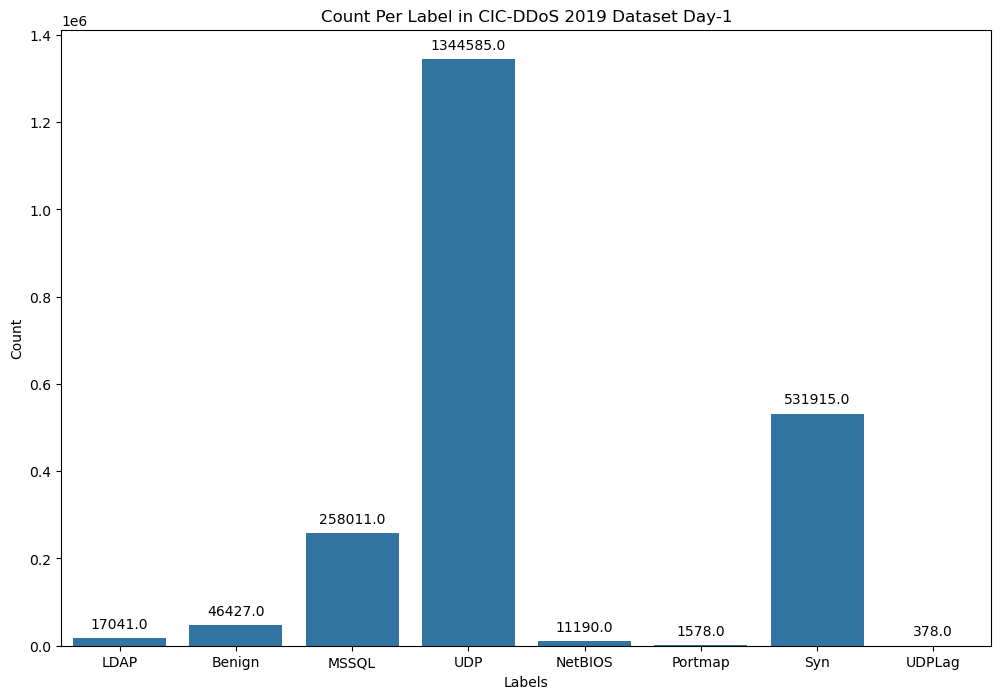

In [14]:
plt.figure(figsize=(12, 8))
# Create a count plot of the string labels
ax = sns.countplot(x=all_y)
# Annotate each bar with its count
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Count Per Label in CIC-DDoS 2019 Dataset Day-1')
plt.show()


In [15]:
unique_value_count = all_y.value_counts()
unique_value_count

Label
UDP        1344585
Syn         531915
MSSQL       258011
Benign       46427
LDAP         17041
NetBIOS      11190
Portmap       1578
UDPLag         378
Name: count, dtype: int64

In [16]:
# summarize distribution
counter = Counter(all_y)
for k,v in counter.items():
    per = v / len(all_y) * 100
    print('Class = %-15s,     n = %-10d,        (%-8.3f%%)' % (k, v, per))

Class = LDAP           ,     n = 17041     ,        (0.771   %)
Class = Benign         ,     n = 46427     ,        (2.100   %)
Class = MSSQL          ,     n = 258011    ,        (11.669  %)
Class = UDP            ,     n = 1344585   ,        (60.810  %)
Class = NetBIOS        ,     n = 11190     ,        (0.506   %)
Class = Portmap        ,     n = 1578      ,        (0.071   %)
Class = Syn            ,     n = 531915    ,        (24.056  %)
Class = UDPLag         ,     n = 378       ,        (0.017   %)


## Dataset verification

In [17]:
all_X.iloc[20:30].head(10)

,Protocol,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,act_data_pkt_fwd,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
20,17,53,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,...,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,17,1,2,0,1472.0,0.0,736.0,736.0,736.0,0.0,...,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,17,48,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,...,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,17,49,2,0,2656.0,0.0,1328.0,1328.0,1328.0,0.0,...,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,17,4,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,...,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,17,6,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,...,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,17,1,2,0,2912.0,0.0,1456.0,1456.0,1456.0,0.0,...,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,17,49,2,0,2928.0,0.0,1464.0,1464.0,1464.0,0.0,...,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28,17,2,2,0,2848.0,0.0,1424.0,1424.0,1424.0,0.0,...,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,17,50,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,...,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Label encoding performed on all_y dataset 

In [18]:
# Apply label encoding to the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(all_y)

# Get the mapping of original labels to encoded values
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

# Print the mapping
print("Label Mapping:")
for label, encoded_value in label_mapping.items():
    print(f"{label}: {encoded_value}")

print (f"Shape of the target values {y_encoded.shape}")

Label Mapping:
Benign: 0
LDAP: 1
MSSQL: 2
NetBIOS: 3
Portmap: 4
Syn: 5
UDP: 6
UDPLag: 7
Shape of the target values (2211125,)


## Train - Test Split on all 77 features

In [19]:
test_size = 0.3 # number of training raws (70%-30%)
random_state = 42 # random seed

X_train_v0, X_test_v0, y_train_v0, y_test_v0 = train_test_split(all_X, y_encoded, 
                                                                test_size=test_size, 
                                                                shuffle=True,
                                                                stratify=y_encoded, 
                                                                random_state=random_state)
X_train_v0.shape, y_train_v0.shape, X_test_v0.shape, y_test_v0.shape

((1547787, 77), (1547787,), (663338, 77), (663338,))

## Dataset Creation with StandardScaler-Random Undersampler-SMOTE with 77 Features

## Calculate the minimum, mean, and median number of instances per class

In [20]:
# Calculate the minimum, mean, and median number of instances per class
class_distribution = pd.Series(y_train_v0).value_counts()
min_instances = class_distribution.min()
mean_instances = int(class_distribution.mean())
median_instances = int(class_distribution.median())
min_instances, mean_instances, median_instances
# sampling_strategy = {cls: mean_instances for cls in class_distribution.index}
# print(sampling_strategy)


(265, 193473, 22214)

In [21]:
def create_datasets(X, y, threshold, scaler):
    print(f'The shape of X and y is ',X.shape, y.shape)
    # Determine the class labels
    class_label = pd.Series(y).unique()

    print('------------------------------------------------')
    print(f'The class encoded labels are ',class_label)
    print (f'The threshold is ', threshold)
    print (f'The scaler is ', scaler)
    print('------------------------------------------------')
    print(f'dataset creation process started for : {threshold} instances for each Class' )
    
    # Determine the classes that need under-sampling and SMOTE
    under_sample_classes = [class_label for class_label, count in class_distribution.items() if count > threshold]
    smote_classes = [class_label for class_label, count in class_distribution.items() if count <= threshold]

    print(f'under sampling classes are: ', under_sample_classes)
    print(f'SMOT Over sampling classes are: ', smote_classes)
    
    # Create a sampling strategy dictionary
    rus_sampling_strategy = {}
    smt_sampling_strategy = {}
    
    for class_label in under_sample_classes:
        rus_sampling_strategy[class_label] = threshold
    
    for class_label in smote_classes:
        smt_sampling_strategy [class_label]= threshold
    
#     transformer = ColumnTransformer([
#         ('scale', StandardScaler(), X.columns)
#     ])
    
    # Define the pipeline
    pipeline = Pipeline([
#         ('transformer', transformer),
        # ('scale', StandardScaler()),
        ('scale', scaler), # Now getting the scaler to work, from function call
        ('rus', RandomUnderSampler(sampling_strategy=rus_sampling_strategy)),
        ('smote', SMOTE(sampling_strategy=smt_sampling_strategy))
    ], verbose=True)

    # Apply the pipeline to create a new dataset
    X_resampled, y_resampled = pipeline.fit_resample(X, y)
#     pipeline.fit(X,y)
    print(f'dataset creation process completed for : {threshold} instances for each Class' )
    return X_resampled, y_resampled, pipeline 

## Dataset Creation with Standard-Scaler Random Undersampler and SMOTE 

In [22]:
# Create three datasets based on the thresholds
X_min_SS_77, y_min_SS_77, pipeline_min_SS_77 = create_datasets(X_train_v0, y_train_v0, min_instances, StandardScaler()) 
# X_mean_SS_77, y_mean_SS_77, pipeline_mean_SS_77 = create_datasets(X_train_v0, y_train_v0, mean_instances, StandardScaler()) 
# X_median_SS_77, y_median_SS_77, pipeline_median_SS_77 = create_datasets(X_train_v0, y_train_v0, median_instances, StandardScaler()) 

The shape of X and y is  (1547787, 77) (1547787,)
------------------------------------------------
The class encoded labels are  [5 6 2 1 4 0 3 7]
The threshold is  265
The scaler is  StandardScaler()
------------------------------------------------
dataset creation process started for : 265 instances for each Class
under sampling classes are:  [6, 5, 2, 0, 1, 3, 4]
SMOT Over sampling classes are:  [7]
[Pipeline] ............. (step 1 of 3) Processing scale, total=   3.6s
[Pipeline] ............... (step 2 of 3) Processing rus, total=   0.4s
[Pipeline] ............. (step 3 of 3) Processing smote, total=   0.0s
dataset creation process completed for : 265 instances for each Class


In [23]:
# X_min_SS_77.shape, y_min_SS_77.shape, X_mean_SS_77.shape, y_mean_SS_77.shape, X_median_SS_77.shape, y_median_SS_77.shape
# X_median_SS_77.shape, y_median_SS_77.shape
X_min_SS_77.shape, y_min_SS_77.shape

((2120, 77), (2120,))

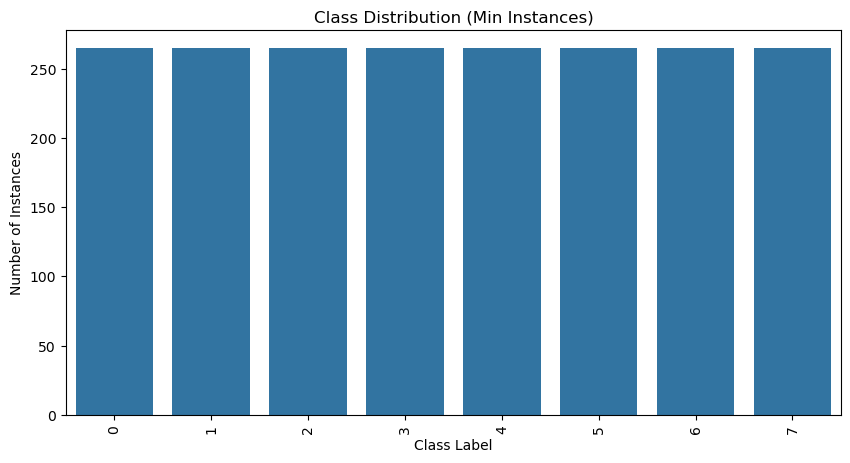

In [24]:

# Function to visualize class distribution
def plot_class_distribution(y, title):
    plt.figure(figsize=(10, 5))
    sns.barplot(x=pd.Series(y).value_counts().index, y=pd.Series(y).value_counts().values)
    plt.title(title)
    plt.xlabel("Class Label")
    plt.ylabel("Number of Instances")
    plt.xticks(rotation=90)
    plt.show()

# Plot for each dataset
plot_class_distribution(y_min_SS_77, "Class Distribution (Min Instances)")
# plot_class_distribution(y_mean_SS_77, "Class Distribution (mean Instances)")
# plot_class_distribution(y_median_SS_77, "Class Distribution (Median Instances)")


## X_test dataset scaling with pipeline scaler

In [25]:
X_test_min_SS_77 = pipeline_min_SS_77.named_steps['scale'].transform(X_test_v0)
# X_test_mean_SS_77 = pipeline_mean_SS_77.named_steps['scale'].transform(X_test_v0)
# X_test_median_SS_77 = pipeline_median_SS_77.named_steps['scale'].transform(X_test_v0)

# X_test_min_SS_77.shape, X_test_mean_SS_77.shape, X_test_median_SS_77.shape
X_test_min_SS_77.shape
# X_test_median_SS_77.shape

(663338, 77)

### Create Validation Set from min-training set of 20%

In [26]:

# Create a validation set (20 of training data)
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_min_SS_77, y_min_SS_77, test_size=0.2, random_state=42, stratify=y_min_SS_77)

# Check dataset shapes
print(f"Training Data Shape: {X_train_final.shape}, {y_train_final.shape}")
print(f"Validation Data Shape: {X_val.shape}, {y_val.shape}")
print(f"Test Data Shape: {X_test_min_SS_77.shape}, {y_test_v0.shape}")


Training Data Shape: (1696, 77), (1696,)
Validation Data Shape: (424, 77), (424,)
Test Data Shape: (663338, 77), (663338,)


In [27]:
# Convert training data to tensors
X_train_tensor = torch.tensor(X_train_final, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_final, dtype=torch.long)  # Classification task

# Convert validation data to tensors
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)  # StandardScaler applied
y_val_tensor = torch.tensor(y_val, dtype=torch.long)

# Convert test data to tensors
X_test_tensor = torch.tensor(X_test_min_SS_77, dtype=torch.float32)  # StandardScaler applied
y_test_tensor = torch.tensor(y_test_v0, dtype=torch.long)

# Print shapes to verify
print("Training Data Shape:", X_train_tensor.shape, y_train_tensor.shape)
print("Validation Data Shape:", X_val_tensor.shape, y_val_tensor.shape)
print("Test Data Shape:", X_test_tensor.shape, y_test_tensor.shape)

Training Data Shape: torch.Size([1696, 77]) torch.Size([1696])
Validation Data Shape: torch.Size([424, 77]) torch.Size([424])
Test Data Shape: torch.Size([663338, 77]) torch.Size([663338])


In [28]:
# Create PyTorch Dataset
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

### Create a DataLoader
#### DataLoader helps with batching, shuffling, and parallel processing for efficient training.

In [29]:
# Define batch size
batch_size = 64  # You can change this based on your system's memory
# Automatically determine an optimal number of workers
num_workers = min(4, torch.get_num_threads())  # Adjust based on your CPU
print("Number of workers:", num_workers)
# Create DataLoader for training and validation data
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size,shuffle=False, num_workers=4, pin_memory=True) 


Number of workers: 4


### Verify DataLoader
#### To check if the DataLoader works correctly, let's load a single batch and inspect the shapes.

In [30]:
# Fetch a batch of data
X_batch, y_batch = next(iter(train_loader))
print("Batch X Shape:", X_batch.shape)
print("Batch y Shape:", y_batch.shape)

Xtest_batch, ytest_batch = next(iter(test_loader))
print("Batch xtest Shape:", Xtest_batch.shape)
print("Batch ytest Shape:", ytest_batch.shape)


Batch X Shape: torch.Size([64, 77])
Batch y Shape: torch.Size([64])
Batch xtest Shape: torch.Size([64, 77])
Batch ytest Shape: torch.Size([64])


## Training and making prediction on resampled dataset

In [31]:

# Define the neural network model
class DDoSClassifier(nn.Module):
    def __init__(self, input_size, num_classes):
        super(DDoSClassifier, self).__init__()

        # Fully connected layers
        self.fc1 = nn.Linear(input_size, 128)  # Input layer
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.3)  # Dropout for regularization

        self.fc2 = nn.Linear(128, 64)  # Hidden layer
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.3)

        self.fc3 = nn.Linear(64, num_classes)  # Output layer
        self.softmax = nn.Softmax(dim=1)  # Softmax activation for multiclass classification

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)

        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)

        x = self.fc3(x)
        x = self.softmax(x)  # Apply softmax for classification
        
        return x

# Get input size (number of features) and number of classes
input_size = X_train_tensor.shape[1]  # Number of features
num_classes = len(set(y_train_tensor))  # Number of unique labels

# Create the model instance
model = DDoSClassifier(input_size, num_classes)

# Print the model summary
print(model)


DDoSClassifier(
  (fc1): Linear(in_features=77, out_features=128, bias=True)
  (relu1): ReLU()
  (dropout1): Dropout(p=0.3, inplace=False)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (dropout2): Dropout(p=0.3, inplace=False)
  (fc3): Linear(in_features=64, out_features=1696, bias=True)
  (softmax): Softmax(dim=1)
)


In [32]:

class ImprovedDDoSClassifier(nn.Module):
    def __init__(self, input_size, num_classes):
        super(ImprovedDDoSClassifier, self).__init__()

        self.fc1 = nn.Linear(input_size, 256)  # Increased neurons
        self.bn1 = nn.BatchNorm1d(256)
        self.act1 = nn.LeakyReLU()
        self.drop1 = nn.Dropout(0.4)

        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.act2 = nn.LeakyReLU()
        self.drop2 = nn.Dropout(0.3)

        self.fc3 = nn.Linear(128, 64)
        self.bn3 = nn.BatchNorm1d(64)
        self.act3 = nn.LeakyReLU()
        self.drop3 = nn.Dropout(0.3)

        self.fc4 = nn.Linear(64, 32)
        self.bn4 = nn.BatchNorm1d(32)
        self.act4 = nn.LeakyReLU()
        self.drop4 = nn.Dropout(0.2)

        self.fc5 = nn.Linear(32, num_classes)

    def forward(self, x):
        x = self.drop1(self.act1(self.bn1(self.fc1(x))))
        x = self.drop2(self.act2(self.bn2(self.fc2(x))))
        x = self.drop3(self.act3(self.bn3(self.fc3(x))))
        x = self.drop4(self.act4(self.bn4(self.fc4(x))))
        x = self.fc5(x)  # No Softmax (Handled in loss function)
        return x

# Get input size (number of features) and number of classes
input_size = X_train_tensor.shape[1]
num_classes = len(set(y_train_tensor))

# Create model instance
model = ImprovedDDoSClassifier(input_size, num_classes)

# Print model summary
print(model)


ImprovedDDoSClassifier(
  (fc1): Linear(in_features=77, out_features=256, bias=True)
  (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): LeakyReLU(negative_slope=0.01)
  (drop1): Dropout(p=0.4, inplace=False)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act2): LeakyReLU(negative_slope=0.01)
  (drop2): Dropout(p=0.3, inplace=False)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (bn3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act3): LeakyReLU(negative_slope=0.01)
  (drop3): Dropout(p=0.3, inplace=False)
  (fc4): Linear(in_features=64, out_features=32, bias=True)
  (bn4): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act4): LeakyReLU(negative_slope=0.01)
  (drop4): Dropout(p=0.2, inplace=False)
  (fc5): Linear(in_features=32, out_features=1

In [ ]:
class Autoencoder(nn.Module):
    def __init__(self, input_size):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, input_size),
            nn.Sigmoid(),
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

class AE_MLP_Classifier(nn.Module):
    def __init__(self, input_size, num_classes):
        super(AE_MLP_Classifier, self).__init__()
        self.autoencoder = Autoencoder(input_size)
        self.classifier = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, num_classes),
            nn.Softmax(dim=1),
        )

    def forward(self, x):
        encoded, _ = self.autoencoder(x)
        return self.classifier(encoded)


In [ ]:


def memory_usage():
    """Returns memory usage in MB."""
    return psutil.Process().memory_info().rss / 1024 ** 2  # Convert bytes to MB

def train_model(model, train_loader, val_loader, criterion, optimizer, epochs, device):
    model.to(device)
    print(f" Training on device: {device}")
    history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}

    start_time = time.time()  # Track training start time
    mem_usage_before = memory_usage()  # Track memory usage before training

    # scaler = torch.cuda.amp.GradScaler()  # Mixed Precision Training
    # scaler = torch.cuda.amp.GradScaler() if device.type == "cuda" else None

    for epoch in range(epochs):
        model.train()
        train_loss, correct, total = 0, 0, 0

        # Use tqdm progress bar
        progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}")

        for X_batch, y_batch in progress_bar:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
            correct += (y_pred.argmax(1) == y_batch).sum().item()
            total += y_batch.size(0)

            avg_loss = train_loss / len(train_loader)
            accuracy = correct / total
            progress_bar.set_postfix(loss=avg_loss, acc=accuracy)

        train_loss /= len(train_loader)
        train_acc = correct / total
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)

        # Validation phase
        model.eval()
        val_loss, correct, total = 0, 0, 0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                y_pred = model(X_batch)
                loss = criterion(y_pred, y_batch)

                val_loss += loss.item()
                correct += (y_pred.argmax(1) == y_batch).sum().item()
                total += y_batch.size(0)

        val_acc = correct / total
        val_loss /= len(val_loader)

        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)


        # print(f"Epoch {epoch+1}: Train Loss={train_loss:.4f}, Train Acc={train_acc:.4f}")
        print(f"Epoch {epoch+1}: Train Loss={train_loss:.4f}, Train Acc={train_acc:.4f} | "
              f"Val Loss={val_loss:.4f}, Val Acc={val_acc:.4f}")

    # Track time and memory usage after training
    end_time = time.time()
    mem_usage_after = memory_usage()

    train_time = end_time - start_time
    train_mem_used = mem_usage_after - mem_usage_before

    print(f"Training Completed! ")
    print(f"Training Time: {train_time:.2f} seconds")
    print(f"Memory Used: {train_mem_used:.2f} MB")

    return train_time, train_mem_used, model, history


In [34]:

def make_predictions(model, test_loader, device):
    model.eval()  # Set to evaluation mode
    start_time = time.time()
    mem_usage_before = memory_usage()

    y_pred_list = []
    with torch.no_grad():
        for batch in test_loader:  # Iterate using batch
            X_batch, _ = batch  # Correctly unpack batch
            # print(f"Batch Type: {type(X_batch)}")  # Debugging statement

            X_batch = X_batch.to(device)  # Move to device
            y_pred = model(X_batch)
            y_pred_list.append(y_pred.argmax(dim=1).cpu().numpy())

    y_pred = np.concatenate(y_pred_list, axis=0)

    end_time = time.time()
    mem_usage_after = memory_usage()

    predict_time = end_time - start_time
    mem_used = mem_usage_after - mem_usage_before

    return predict_time, mem_used, y_pred


In [35]:

def make_report(y_test, y_pred, model, file_name, train_time, train_mem_used, predict_time, predict_mem_used):
    
    try:
        # Convert inputs to NumPy arrays if they are tensors
        if isinstance(y_test, torch.Tensor):
            y_test = y_test.cpu().numpy()
        if isinstance(y_pred, torch.Tensor):
            y_pred = y_pred.cpu().numpy()

        # Classification report & Confusion matrix
        report = classification_report(y_test, y_pred, digits=5, output_dict=True)
        conf_matrix = confusion_matrix(y_test, y_pred)

        # Convert to DataFrame
        report_df = pd.DataFrame(report).transpose()
        conf_matrix_df = pd.DataFrame(conf_matrix)
    
        # Create directories
        base_directory = 'DL_Model_Reports'
        dir_name = 'MLP_pytorch_reports'
        output_directory = os.path.join(base_directory, dir_name)
        os.makedirs(output_directory, exist_ok=True)

        output_file = os.path.join(output_directory, f'{file_name}_report.xlsx')

        # Save to Excel
        with pd.ExcelWriter(output_file, engine='xlsxwriter') as writer:
            report_df.to_excel(writer, sheet_name='Classification Report')
            conf_matrix_df.to_excel(writer, sheet_name='Confusion Matrix')

            pd.DataFrame({'Training Time': [train_time]}).to_excel(writer, sheet_name='Training Time')
            pd.DataFrame({'Training Memory Used': [train_mem_used]}).to_excel(writer, sheet_name='Training Memory Used')
            pd.DataFrame({'Prediction Time': [predict_time]}).to_excel(writer, sheet_name='Prediction Time')
            pd.DataFrame({'Prediction Memory Used': [predict_mem_used]}).to_excel(writer, sheet_name='Prediction Memory Used')

            # Save model architecture
            model_summary = [str(model)]
        # model_summary.append(str(model))  # Save model details
            pd.DataFrame({'Model Summary': model_summary}).to_excel(writer, sheet_name='Model Summary')

        print(f"Report saved successfully: {output_file}")
        return report, conf_matrix
    
    except Exception as e:
        print(f"An error occurred: {e}")
        return None


In [36]:
# Training and prediction with min_dataset

# Define Hyperparameters
EPOCHS = 20
# BATCH_SIZE = 64
LEARNING_RATE = 0.001

# Define Loss Function & Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

# Move model to GPU/CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Train Model
train_time, train_mem_used, trained_model, history = train_model(
    model, train_loader, val_loader, criterion, optimizer, EPOCHS, device)

print(f"Training time: {train_time:.2f} seconds, Memory used: {train_mem_used:.2f} MB")

# Make Predictions
predict_time, predict_mem_used, y_pred_test = make_predictions(
    trained_model, test_loader, device)

print(f"Prediction time: {predict_time:.2f} seconds, Memory used: {predict_mem_used:.2f} MB")

# Extract true labels from test_loader
y_true_test = np.concatenate([y_batch.numpy() for _, y_batch in test_loader], axis=0)

# Generate Classification Report
file_name = "MLP_model_median_ss_77"
report, confusion_mat = make_report(y_true_test, y_pred_test, trained_model, file_name, 
                                    train_time, train_mem_used, predict_time, predict_mem_used)

print("Model evaluation completed!")


c:\Users\Mansoor\anaconda3\envs\tsf-2\lib\site-packages\torch\amp\grad_scaler.py:131: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(


 Training on device: cpu


Epoch 1/20: 100%|██████████| 27/27 [00:11<00:00,  2.42it/s, acc=0.0967, loss=6.88] 


Epoch 1: Train Loss=6.8785, Train Acc=0.0967 | Val Loss=6.3954, Val Acc=0.5920


Epoch 2/20: 100%|██████████| 27/27 [00:11<00:00,  2.42it/s, acc=0.515, loss=5.71]


Epoch 2: Train Loss=5.7149, Train Acc=0.5153 | Val Loss=5.1656, Val Acc=0.6061


Epoch 3/20: 100%|██████████| 27/27 [00:11<00:00,  2.32it/s, acc=0.608, loss=4.64]


Epoch 3: Train Loss=4.6428, Train Acc=0.6079 | Val Loss=4.0942, Val Acc=0.6392


Epoch 4/20: 100%|██████████| 27/27 [00:10<00:00,  2.47it/s, acc=0.64, loss=3.51] 


Epoch 4: Train Loss=3.5147, Train Acc=0.6403 | Val Loss=3.0492, Val Acc=0.6958


Epoch 5/20: 100%|██████████| 27/27 [00:10<00:00,  2.54it/s, acc=0.672, loss=2.55]


Epoch 5: Train Loss=2.5452, Train Acc=0.6722 | Val Loss=2.0201, Val Acc=0.7429


Epoch 6/20: 100%|██████████| 27/27 [00:11<00:00,  2.45it/s, acc=0.683, loss=1.84] 


Epoch 6: Train Loss=1.8445, Train Acc=0.6828 | Val Loss=1.3766, Val Acc=0.7500


Epoch 7/20: 100%|██████████| 27/27 [00:12<00:00,  2.25it/s, acc=0.693, loss=1.42] 


Epoch 7: Train Loss=1.4214, Train Acc=0.6934 | Val Loss=1.0695, Val Acc=0.7618


Epoch 8/20: 100%|██████████| 27/27 [00:11<00:00,  2.44it/s, acc=0.735, loss=1.15] 


Epoch 8: Train Loss=1.1501, Train Acc=0.7347 | Val Loss=0.8804, Val Acc=0.7712


Epoch 9/20: 100%|██████████| 27/27 [00:11<00:00,  2.37it/s, acc=0.734, loss=1]    


Epoch 9: Train Loss=1.0048, Train Acc=0.7341 | Val Loss=0.7705, Val Acc=0.7665


Epoch 10/20: 100%|██████████| 27/27 [00:11<00:00,  2.36it/s, acc=0.747, loss=0.903]


Epoch 10: Train Loss=0.9028, Train Acc=0.7471 | Val Loss=0.6930, Val Acc=0.7759


Epoch 11/20: 100%|██████████| 27/27 [00:11<00:00,  2.43it/s, acc=0.75, loss=0.846] 


Epoch 11: Train Loss=0.8455, Train Acc=0.7500 | Val Loss=0.6540, Val Acc=0.7807


Epoch 12/20: 100%|██████████| 27/27 [00:11<00:00,  2.27it/s, acc=0.729, loss=0.828]


Epoch 12: Train Loss=0.8279, Train Acc=0.7288 | Val Loss=0.6330, Val Acc=0.7736


Epoch 13/20: 100%|██████████| 27/27 [00:10<00:00,  2.48it/s, acc=0.767, loss=0.749]


Epoch 13: Train Loss=0.7488, Train Acc=0.7665 | Val Loss=0.5868, Val Acc=0.7972


Epoch 14/20: 100%|██████████| 27/27 [00:11<00:00,  2.39it/s, acc=0.757, loss=0.73] 


Epoch 14: Train Loss=0.7303, Train Acc=0.7571 | Val Loss=0.5869, Val Acc=0.7995


Epoch 15/20: 100%|██████████| 27/27 [00:13<00:00,  1.98it/s, acc=0.775, loss=0.691]


Epoch 15: Train Loss=0.6907, Train Acc=0.7748 | Val Loss=0.5602, Val Acc=0.7995


Epoch 16/20: 100%|██████████| 27/27 [00:11<00:00,  2.38it/s, acc=0.784, loss=0.675]


Epoch 16: Train Loss=0.6748, Train Acc=0.7836 | Val Loss=0.5547, Val Acc=0.7901


Epoch 17/20: 100%|██████████| 27/27 [00:13<00:00,  2.05it/s, acc=0.78, loss=0.635] 


Epoch 17: Train Loss=0.6354, Train Acc=0.7801 | Val Loss=0.5379, Val Acc=0.8019


Epoch 18/20: 100%|██████████| 27/27 [00:11<00:00,  2.26it/s, acc=0.767, loss=0.65] 


Epoch 18: Train Loss=0.6504, Train Acc=0.7665 | Val Loss=0.5234, Val Acc=0.8090


Epoch 19/20: 100%|██████████| 27/27 [00:10<00:00,  2.54it/s, acc=0.762, loss=0.645]


Epoch 19: Train Loss=0.6446, Train Acc=0.7618 | Val Loss=0.5158, Val Acc=0.8255


Epoch 20/20: 100%|██████████| 27/27 [00:10<00:00,  2.51it/s, acc=0.761, loss=0.65] 


Epoch 20: Train Loss=0.6497, Train Acc=0.7606 | Val Loss=0.5083, Val Acc=0.8231
Training Completed! 
Training Time: 445.41 seconds
Memory Used: 9.80 MB
Training time: 445.41 seconds, Memory used: 9.80 MB
Prediction time: 55.63 seconds, Memory used: 11.82 MB
Report saved successfully: DL_Model_Reports\MLP_pytorch_reports\MLP_model_median_ss_77_report.xlsx
Model evaluation completed!


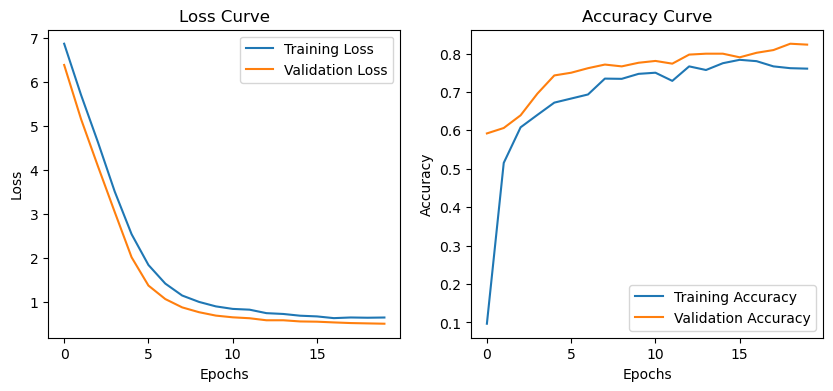

In [37]:
# import matplotlib.pyplot as plt

# Extract history details
train_loss = history['train_loss']
val_loss = history['val_loss']
train_acc = history['train_acc']
val_acc = history['val_acc']

# Plot Loss Curve
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

# Plot Accuracy Curve
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.show()


In [38]:
# Plot loss
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.title('Training vs Validation Loss')
# plt.show()


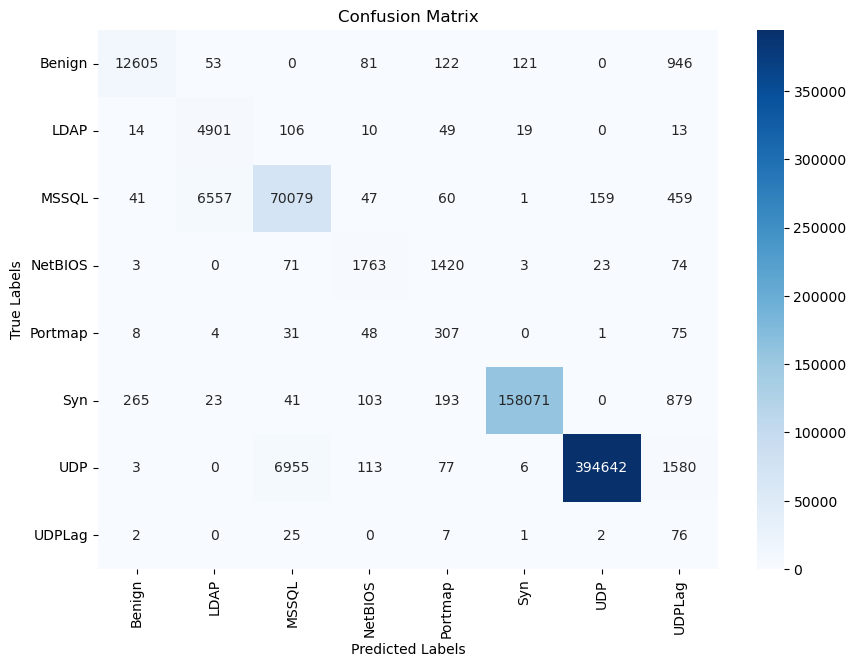

In [39]:
# Generate the confusion matrix

# Convert numerical predictions back to original labels
y_test_labels = label_encoder.inverse_transform(y_test_v0)  # Convert y_test to original labels
y_pred_labels = label_encoder.inverse_transform(y_pred_test)  # Convert predictions to original labels

conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(rotation=90)  # Rotate labels if they are long
plt.yticks(rotation=0)
plt.show()


## Dataset Creation with MinMax-Random Undersampler-SMOTE 

In [40]:
# Create three datasets based on the thresholds
X_min_mm_77, y_min_mm_77, pipeline_min_mm_77 = create_datasets(X_train_v0, y_train_v0, min_instances, MinMaxScaler())
# X_mean_mm_77, y_mean_mm_77, pipeline_mean_mm_77 = create_datasets(X_train_v0, y_train_v0, mean_instances, MinMaxScaler()) 
# X_median_mm_77, y_median_mm_77, pipeline_median_mm_77 = create_datasets(X_train_v0, y_train_v0, median_instances, MinMaxScaler()) 

The shape of X and y is  (1547787, 77) (1547787,)
------------------------------------------------
The class encoded labels are  [5 6 2 1 4 0 3 7]
The threshold is  265
The scaler is  MinMaxScaler()
------------------------------------------------
dataset creation process started for : 265 instances for each Class
under sampling classes are:  [6, 5, 2, 0, 1, 3, 4]
SMOT Over sampling classes are:  [7]
[Pipeline] ............. (step 1 of 3) Processing scale, total=   2.3s
[Pipeline] ............... (step 2 of 3) Processing rus, total=   0.7s
[Pipeline] ............. (step 3 of 3) Processing smote, total=   0.0s
dataset creation process completed for : 265 instances for each Class


In [41]:
# X_min_SS_77.shape, y_min_SS_77.shape, X_mean_SS_77.shape, y_mean_SS_77.shape, X_median_SS_77.shape, y_median_SS_77.shape
# X_median_mm_77.shape, y_median_mm_77.shape
X_min_mm_77.shape, y_min_mm_77.shape

((2120, 77), (2120,))

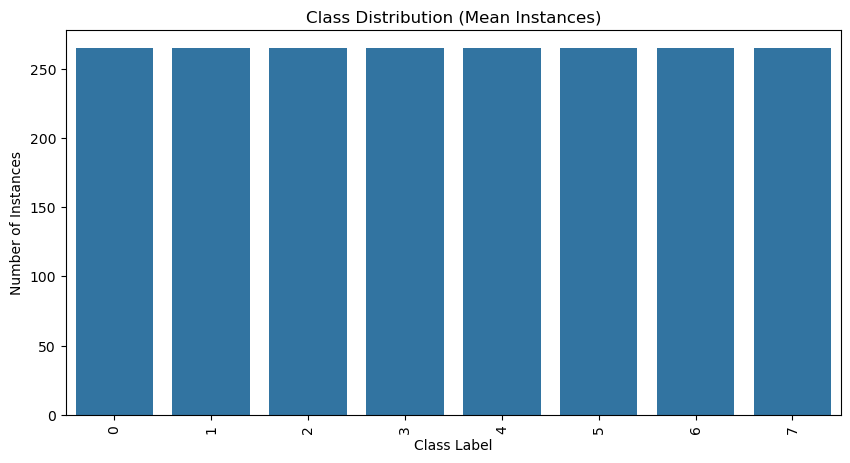

In [42]:

# Function to visualize class distribution
def plot_class_distribution(y, title):
    plt.figure(figsize=(10, 5))
    sns.barplot(x=pd.Series(y).value_counts().index, y=pd.Series(y).value_counts().values)
    plt.title(title)
    plt.xlabel("Class Label")
    plt.ylabel("Number of Instances")
    plt.xticks(rotation=90)
    plt.show()

# Plot for each dataset
# plot_class_distribution(y_min_SS_77, "Class Distribution (Min Instances)")
plot_class_distribution(y_min_mm_77, "Class Distribution (Mean Instances)")
# plot_class_distribution(y_median_SS_77, "Class Distribution (Median Instances)")


## X_test dataset scaling with pipeline scaler

In [43]:
X_test_min_mm_77 = pipeline_min_mm_77.named_steps['scale'].transform(X_test_v0)
# X_test_mean_mm_77 = pipeline_mean_mm_77.named_steps['scale'].transform(X_test_v0)
# X_test_median_mm_77 = pipeline_median_mm_77.named_steps['scale'].transform(X_test_v0)

# X_test_min_SS_77.shape, X_test_median_SS_77.shape, X_test_median_SS_77.shape
X_test_min_mm_77.shape

(663338, 77)

## Create Validation Set from min-training set of 20%

In [44]:

# Create a validation set (20 of training data)
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_min_mm_77, y_min_mm_77, test_size=0.2, random_state=42, stratify=y_min_mm_77)

# Check dataset shapes
print(f"Training Data Shape: {X_train_final.shape}, {y_train_final.shape}")
print(f"Validation Data Shape: {X_val.shape}, {y_val.shape}")
print(f"Test Data Shape: {X_test_min_mm_77.shape}, {y_test_v0.shape}")


Training Data Shape: (1696, 77), (1696,)
Validation Data Shape: (424, 77), (424,)
Test Data Shape: (663338, 77), (663338,)


## Training and making prediction on resampled dataset

In [48]:
# Training and prediction with min_dataset

# Define Hyperparameters
EPOCHS = 20
# BATCH_SIZE = 64
LEARNING_RATE = 0.001

# Define Loss Function & Optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

# Move model to GPU/CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Train Model
train_time, train_mem_used, trained_model, history = train_model(
    model, train_loader, val_loader, criterion, optimizer, EPOCHS, device)

print(f"Training time: {train_time:.2f} seconds, Memory used: {train_mem_used:.2f} MB")

# Make Predictions
predict_time, predict_mem_used, y_pred_test = make_predictions(
    trained_model, test_loader, device)

print(f"Prediction time: {predict_time:.2f} seconds, Memory used: {predict_mem_used:.2f} MB")

# Extract true labels from test_loader
y_true_test = np.concatenate([y_batch.numpy() for _, y_batch in test_loader], axis=0)

# Generate Classification Report
file_name = "MLP_model_median_mm_77"
report, confusion_mat = make_report(y_true_test, y_pred_test, trained_model, file_name, 
                                    train_time, train_mem_used, predict_time, predict_mem_used)

print("Model evaluation completed!")


c:\Users\Mansoor\anaconda3\envs\tsf-2\lib\site-packages\torch\amp\grad_scaler.py:131: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(


 Training on device: cpu


Epoch 1/20:   0%|          | 0/27 [00:00<?, ?it/s]

Epoch 1/20: 100%|██████████| 27/27 [00:11<00:00,  2.29it/s, acc=0.811, loss=0.494]


Epoch 1: Train Loss=0.4938, Train Acc=0.8107 | Val Loss=0.4522, Val Acc=0.8349


Epoch 2/20: 100%|██████████| 27/27 [00:11<00:00,  2.25it/s, acc=0.815, loss=0.486]


Epoch 2: Train Loss=0.4858, Train Acc=0.8154 | Val Loss=0.4455, Val Acc=0.8278


Epoch 3/20: 100%|██████████| 27/27 [00:10<00:00,  2.52it/s, acc=0.792, loss=0.525]


Epoch 3: Train Loss=0.5246, Train Acc=0.7919 | Val Loss=0.4461, Val Acc=0.8514


Epoch 4/20: 100%|██████████| 27/27 [00:11<00:00,  2.38it/s, acc=0.826, loss=0.447]


Epoch 4: Train Loss=0.4468, Train Acc=0.8261 | Val Loss=0.4448, Val Acc=0.8373


Epoch 5/20: 100%|██████████| 27/27 [00:10<00:00,  2.58it/s, acc=0.82, loss=0.482] 


Epoch 5: Train Loss=0.4825, Train Acc=0.8196 | Val Loss=0.4309, Val Acc=0.8514


Epoch 6/20: 100%|██████████| 27/27 [00:11<00:00,  2.42it/s, acc=0.811, loss=0.494]


Epoch 6: Train Loss=0.4936, Train Acc=0.8113 | Val Loss=0.4431, Val Acc=0.8373


Epoch 7/20: 100%|██████████| 27/27 [00:10<00:00,  2.52it/s, acc=0.814, loss=0.466]


Epoch 7: Train Loss=0.4661, Train Acc=0.8137 | Val Loss=0.4397, Val Acc=0.8373


Epoch 8/20: 100%|██████████| 27/27 [00:10<00:00,  2.56it/s, acc=0.817, loss=0.485]


Epoch 8: Train Loss=0.4853, Train Acc=0.8166 | Val Loss=0.4275, Val Acc=0.8491


Epoch 9/20: 100%|██████████| 27/27 [00:10<00:00,  2.54it/s, acc=0.808, loss=0.486]


Epoch 9: Train Loss=0.4855, Train Acc=0.8084 | Val Loss=0.4369, Val Acc=0.8255


Epoch 10/20: 100%|██████████| 27/27 [00:10<00:00,  2.53it/s, acc=0.817, loss=0.477]


Epoch 10: Train Loss=0.4771, Train Acc=0.8166 | Val Loss=0.4343, Val Acc=0.8396


Epoch 11/20: 100%|██████████| 27/27 [00:10<00:00,  2.55it/s, acc=0.818, loss=0.446]


Epoch 11: Train Loss=0.4463, Train Acc=0.8184 | Val Loss=0.4333, Val Acc=0.8491


Epoch 12/20: 100%|██████████| 27/27 [00:10<00:00,  2.54it/s, acc=0.813, loss=0.464]


Epoch 12: Train Loss=0.4637, Train Acc=0.8131 | Val Loss=0.4329, Val Acc=0.8420


Epoch 13/20: 100%|██████████| 27/27 [00:10<00:00,  2.50it/s, acc=0.813, loss=0.488]


Epoch 13: Train Loss=0.4879, Train Acc=0.8131 | Val Loss=0.4300, Val Acc=0.8491


Epoch 14/20: 100%|██████████| 27/27 [00:10<00:00,  2.46it/s, acc=0.833, loss=0.429]


Epoch 14: Train Loss=0.4289, Train Acc=0.8331 | Val Loss=0.4224, Val Acc=0.8420


Epoch 15/20: 100%|██████████| 27/27 [00:10<00:00,  2.56it/s, acc=0.821, loss=0.467]


Epoch 15: Train Loss=0.4673, Train Acc=0.8208 | Val Loss=0.4302, Val Acc=0.8349


Epoch 16/20: 100%|██████████| 27/27 [00:10<00:00,  2.57it/s, acc=0.813, loss=0.466]


Epoch 16: Train Loss=0.4657, Train Acc=0.8131 | Val Loss=0.4243, Val Acc=0.8491


Epoch 17/20: 100%|██████████| 27/27 [00:10<00:00,  2.49it/s, acc=0.823, loss=0.452]


Epoch 17: Train Loss=0.4518, Train Acc=0.8225 | Val Loss=0.4250, Val Acc=0.8514


Epoch 18/20: 100%|██████████| 27/27 [00:11<00:00,  2.41it/s, acc=0.816, loss=0.46] 


Epoch 18: Train Loss=0.4600, Train Acc=0.8160 | Val Loss=0.4241, Val Acc=0.8585


Epoch 19/20: 100%|██████████| 27/27 [00:10<00:00,  2.58it/s, acc=0.822, loss=0.464]


Epoch 19: Train Loss=0.4643, Train Acc=0.8219 | Val Loss=0.4227, Val Acc=0.8514


Epoch 20/20: 100%|██████████| 27/27 [00:10<00:00,  2.52it/s, acc=0.821, loss=0.456]


Epoch 20: Train Loss=0.4562, Train Acc=0.8213 | Val Loss=0.4218, Val Acc=0.8349
Training Completed! 
Training Time: 417.52 seconds
Memory Used: -55.71 MB
Training time: 417.52 seconds, Memory used: -55.71 MB
Prediction time: 54.45 seconds, Memory used: 9.75 MB
Report saved successfully: DL_Model_Reports\MLP_pytorch_reports\MLP_model_median_mm_77_report.xlsx
Model evaluation completed!


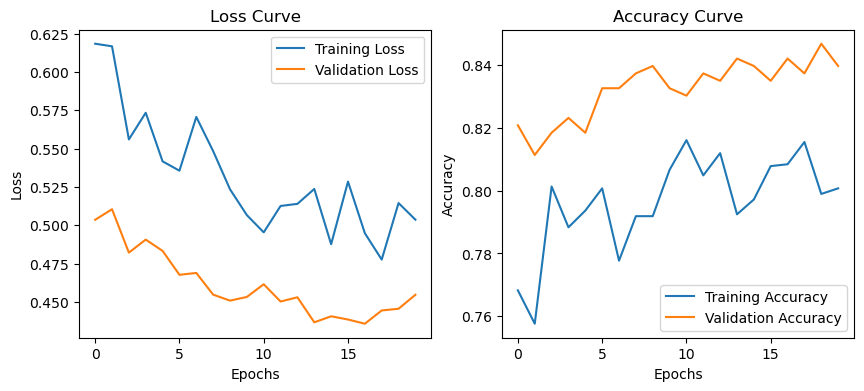

In [46]:

# Extract history details
train_loss = history['train_loss']
val_loss = history['val_loss']
train_acc = history['train_acc']
val_acc = history['val_acc']

# Plot Loss Curve
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

# Plot Accuracy Curve
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.show()



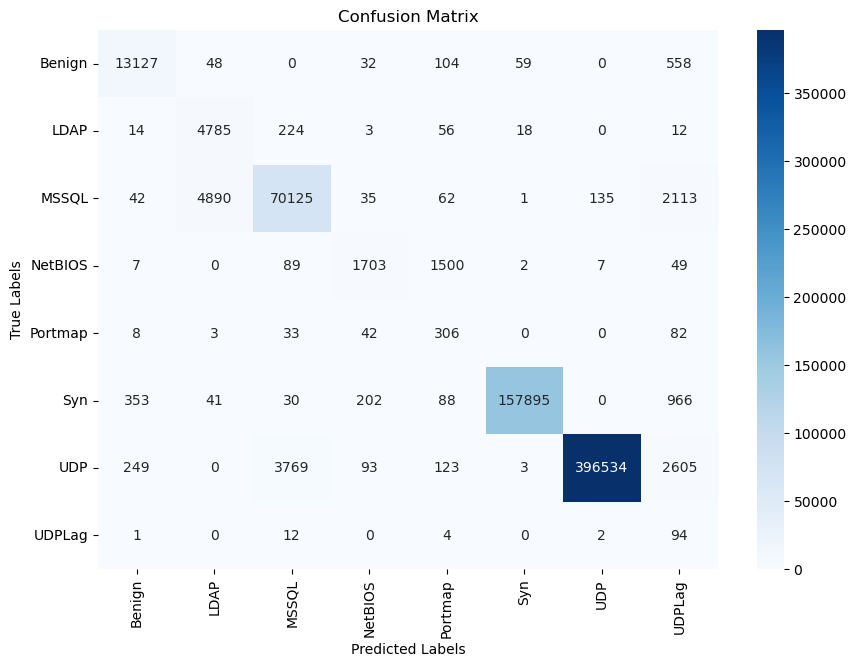

In [47]:
# Generate the confusion matrix

# Convert numerical predictions back to original labels
y_test_labels = label_encoder.inverse_transform(y_test_v0)  # Convert y_test to original labels
y_pred_labels = label_encoder.inverse_transform(y_pred_test)  # Convert predictions to original labels

conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(rotation=90)  # Rotate labels if they are long
plt.yticks(rotation=0)
plt.show()
